# Project for Machine Learning and Statistics - December 2021


## Submitted by Sinéad Duffy, ID 10016151

***

### Notebook 1

#### Problem Statement - write an overview of the scikit-learn library, and outline (using examples) 3 algorithms of that package

***
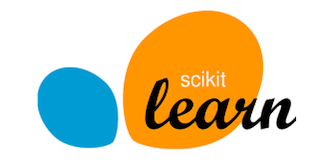

### Introduction

Scikit-learn is a library within Python that allows for machine learning scenarios to be completed using regression / classifification as well as clustering.$^1$, $^2$ The library draws on other packages / libraries such as NumPy, Matplotlib, Pandas etc in to improve functionality.$^3$  
<br>
The scikit-learn library allows developers to use supervised and unsupervised learning algorithms to test data that is loaded using a .csv file (in the case of this noteook).  Within supervised learning 17 distinct areas are outlined, such as linear models, kernel ridge regression, stochastic gradient descent, nearest neighbours and decision tress.$^1$      Unsupervisied learning has 9 distinct areas such as Gaussian mixture models, manifold learning, clustering and biclustering.$^1$.
<br><br>
The concepts of supervised and unsupervised learning are outlined in the next section.
<br><br>
As outlined above, the brief of this notebook is to outline 3 of the algorithms of the scikit-learn library.  The notebook will be segmented into the following sections;<br>

1. Introduction
2. Algorithn 1 - Logistic Regression
3. Algorithn 2 - Naive Bayes (Gaussian Function)
4. Algorithm 3 - Decision Trees
5. Conclusion
6. References

<br>
Explanations of each algorithm are included in the following sections as well as examples worked out in python code.
<br><br>
The refrences used throughout the notebook are outlined in section 6. Throughout the notebook footnotes are used to indicate where specific refrences are used.
<br><br>

### 1. Introduction to Machine Learning with scikit-learn

Machine Learning takes place when a set of data is inputted to a computer and split into two smaller datasets (test and train) with the test dataset being trained using a chosen algorithm to idenfity if any patterns exist within that smaller subset.  Once the data has been 'trained', the computer will then rerun the choosen algorithm to predict any patterns that are present in the 'test' dataset.  The output from the test data should be examined to see how well it performed agains the dataset to see the level of success there was in predicted results verus actual results.$^1$, $^3$, $^6$ 
<br><br>

To complete the analysis of the data, the main two approaches used are; supervised and unsupervised learning.$^1$, $^3$, $^6$ 
<br><br>
<b>Supervised learning</b><br><br>
This type of analysis is completed when the data set has a set of defined and label data.  
The analysis uses classification or regression to understand the data in the dataset.  In the case of <i>classification analysis</i>, the data is placed into categories which will in turn will allow the algorithim to place similiar types of data into categories on it's own.  For example; a dataset of fruit, based on the charateristics, it would be possible for the computer to seperate out apples / oranges / bananas and grapes from each other using classification.$^1$, $^6$, $^8$
<br>
<i>Regression analysis</i> on the other hand, uses the relationship between two variables to to predict an specified outcome.  For example, the age of a tree could be said to depend on its height and circumference.$^1$, $^6$, $^8$
<br><br>
Supervisied learning is relatively easy to implement as scikit-learn has a wealth of inbuilt algortihms that a programmer can use to complete the analysis.  The chosen dataset will already have a structure imposed on it in that it will already be labeled before loading to the program, which in turn will make the classification analysis faster.  Most importantly, it is possible for the algorithm to learn from the given dataset the more information it has.

<b>Unsupervised learning</b>
<br><br>
Unsuervised learnin gon the other hand involves unlabeled data, or data that has not been fully labeled.$^1$, $^6$, $^8$  The main aim of the analysis may be to idenify if any relationships (clusters) exist between the datatypes or if there is a distribution that can be applied etc. $^1$, $^6$, $^8$
<br><br>
It's possible to say that the key benefit of unsupervised learning is that it helps revel patterns in the data that may not be readily apparent.


In [1]:
# importing libraries to complete the analysis

# data processing libraries
import numpy as np
import csv
import pandas as pd

# libraries to plot results
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("dark")
sns.set_theme(style="ticks")

# sklearn libraries to complete the analysis
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod

# models  and classifiers for Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# libraries for the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### 1.2 The Heart Disease Data Set.

The dataset selected for this analysis consists of 303 rows and 14 distict attributes, and is often referred to as the Cleveland Heart Diease dataset.  The original dataset had 76 distinct attributes.  For the purpose of this notebook, the author has chosen to use the consolidated dataset which has 14 distinct attributes, and the origianl 303 rows of data.

Each of the attributes $^5$ has be as defined as;

- Age: the age of the patient.
- Sex: displays the gender of the patient, shown as either 1 = male  or 0 = female
- Chest-pain type: displays the type of chest-pain experienced by the patient shown as 1 = typical angina / 2 = atypical angina / 3 = non — anginal pain / 4 = asymptotic
- Resting Blood Pressure: displays the resting blood pressure value of the patient in units of mmHg
- Serum Cholestrol: displays the serum cholesterol in units of mg/dl
- Fasting Blood Sugar: compares the fasting blood sugar value of the patient with 120mg/dl. Fasting been shown as blood sugar less than 120mg/dl is 1 (true)  ....   else : 0 (false)
- Resting ECG : shows the resting electrocardiographic results of 0 = normal / 1 = having ST-T wave abnormality / 2 = left ventricular hyperthrophy
- Max heart rate achieved : shows the max heart rate of the patiend.
- Exercise induced angina is shown by either a 1 = yes  or  0 = no
- ST depression induced by exercise relative to rest: is shown by a value which is an integer or float.
- Peak exercise ST segment : is shown as either 1 = upsloping / 2 = flat / 3 = downsloping
- Number of major vessels (0–3) colored by flourosopy
- Thal : shows the thalassemia of the patient and it is either 3 = normal / 6 = fixed defect / 7 = reversible defect
- Num : shows if the patient has heart disease or not and the values are either 0 = absence / 1, 2, 3, 4 = present



In [2]:
#importing a csv file using pandas to access the data
df = pd.read_csv('Datasets\heart.csv')

#print the summary data of the datafile
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   CP        303 non-null    int64  
 3   Trestbps  303 non-null    int64  
 4   Chol      303 non-null    int64  
 5   FBS       303 non-null    int64  
 6   RestECG   303 non-null    int64  
 7   Thalach   303 non-null    int64  
 8   Exang     303 non-null    int64  
 9   OldPeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  CA        303 non-null    int64  
 12  Thal      303 non-null    int64  
 13  Num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
# print the dataframe and show the types of data that it contains
print(df)

In [3]:
# convert float 64 to int64 type to allow processing to take place
df['OldPeak'] = df['OldPeak'].astype(np.int64)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       303 non-null    int64
 1   Sex       303 non-null    int64
 2   CP        303 non-null    int64
 3   Trestbps  303 non-null    int64
 4   Chol      303 non-null    int64
 5   FBS       303 non-null    int64
 6   RestECG   303 non-null    int64
 7   Thalach   303 non-null    int64
 8   Exang     303 non-null    int64
 9   OldPeak   303 non-null    int64
 10  Slope     303 non-null    int64
 11  CA        303 non-null    int64
 12  Thal      303 non-null    int64
 13  Num       303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB
None


## What the analysis should look for 

Once the data has been loaded into the notebook, it's important to confirm what analysis will be completed.  As outined above, the data set is looking at whither a patient has been found to have heart diease or not.
<br><br>
The column that tracks this result is the 'num' column.  As outlined above, a zero (0) result says no heart diease has been found, any other result (1 to 4) show that it has been found.

The following sections outline the preparation of the data for analysis, as well as the different analysis that is carried out by the author.


## Exploring the imported dataset

In [ ]:
# describe the main stat's output of the data frame
df.describe()

In [ ]:
# by using the group by function, it is possible to see how the data is grouped, based on the 'Num' column
x = df.groupby("Num")
x

In [ ]:
# displays the averages of each column against the results within the 'Num' column.

x.mean()

The dataset allows a programmer to determine if the patient has heart diease or not.  The column 'num' displays the result of the analysis.  Any result in num, other than zero (0), indicates that the patient has heart diease.  A zero (0) result indicates that heart diease is not present.
<br><br>
The num column once it is loaded into the notebook, has values of 0 to 4 recorded.  The explaination of the data set outlines that heart diease is not present (0), or it is present (1 / 2 / 3 / 4).   In order to store a true / false result, the author can use the <i>map() function</i> in pandas to assign a different value for the duration of the program.  The values stored in the dataframe are not altered.
<br><br>
In this instance, the value of 1 is assinged to values 1 / 2 / 3 / 4 that are stored in the num column of the data frame.  Thus, giving a true or false value to the column.
<br><br>
For ease of reference, the same method is used on the 'sex' column to give a male or female value rather than the existing numerical one.  As a reminder, the gender of the patient, shown as either 1 = male  or 0 = female.

In [4]:
# using pandas to map the values of the 'Num' column to either true (represented by a 1) or false (represented by a 0)
df['Num'] = df.Num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# confirm that the column Num is still an integer
df['Num']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: Num, Length: 303, dtype: int64

In [ ]:
# plotting Age against Max Heart Rate (Thalach) to show those with heart diease 
# number represents those diagnosed with / without heart diease

plt.scatter(df.Age[df.Num == 1], df.Thalach[df.Num == 1])
plt.scatter(df.Age[df.Num == 0], df.Thalach[df.Num == 0])
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# plotting Age against Chest Pain Type (CP) to show those with heart diease 
# number represents those diagnosed with / without heart diease

plt.scatter(df.Age[df.Num == 1], df.CP[df.Num == 1])
plt.scatter(df.Age[df.Num == 0], df.CP[df.Num == 0])
plt.title("Heart Disease show by Patient Age against Chest Pain Type")
plt.xlabel("Age")
plt.ylabel("Chest Pain Type")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# plotting Age against Cholestoral (Chol) to show those with heart diease 
# number represents those diagnosed with / without heart diease

plt.scatter(df.Age[df.Num == 1], df.Chol[df.Num == 1])
plt.scatter(df.Age[df.Num == 0], df.Chol[df.Num == 0])
plt.title("Heart Disease show by Patient Age against Cholestoral")
plt.xlabel("Age")
plt.ylabel("Cholestoral")
plt.legend(["Disease", "No Disease"]);

In [ ]:
#plot all the variables against each other to see what the data looks like.
sns.pairplot(df, hue="Num");

The pair plot above helps to show all the variables, and to see if any relationships or correlations exist between them.  The data in the pair plot plotted against the variable (hue) Num.  As described above, if the value of Num is 0, then no heart diease is found in the patient.  A value of 1 outlines that heart diease is present in the patient.
<br><br>
Visualising the data using Seaborn's pairplot, helps to show that relationships / correlations exist between several of the variables.  For example, OldPeak shows correlations with Age / Testbps / Chol and Thalach.  The correlations are both positive as in OldPeak with Chol, Testbps and Thalach, as well as neutral in the case of OldPeak and Age.
<br><br>
Using a correlation heatplot (below) it is possible to show relationship or features between two values,$^9$, $^10$. To display a correlation, Panda uses the function $data.corr()$.

There are three different models of correlations that can be used by Pandas. They are;

- Pearson's r - maps the linear relationsship between two variables.$^11$
- Spearman's rho - maps the rank of variables.$^12$
- Kendall's tau - maps the rank of variables against their position in the data, i.e first / second etc.$^13$

The cell below below outlines the correlation of the dataset. 'Age' is the variable that has been used for the correlation, and is compared against each of the other variables.  The Table below outlines what a negative and positve correlation results in$^10$.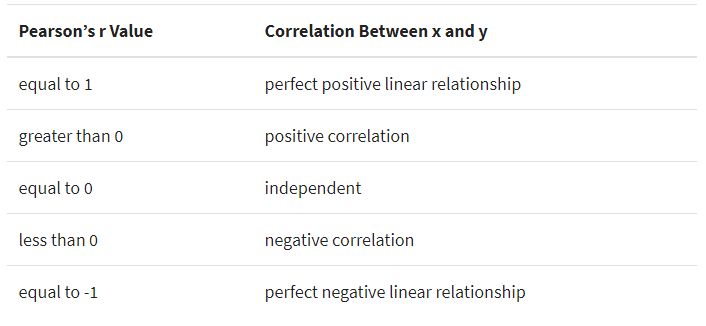

In [ ]:
# correlation Mapping

correlation = df.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r");

#### 1.2 Classification Problem

As stated previously, the purpose of this notebook is to look at the data, and see if it is possible to predict if heart diesase is present in a given patient.  
<br>
The last column in the dataset (Num) outlines the if heart diesease is present or not.  The Author has used the $ map()$ to easily identify if this is true ($1$) or false ($0$) no heart diease found in the patient.  The following sections will outline how classification is completed for the heart diease dataset.

<b>Classification defined</b>
Classification is part of the supverised learning approach to machine learning as outlined above. IBM defines Supervised Learning as an "approach that’s defined by its use of labeled datasets".$8$  This basically means that the data to be analyzed has already had labels applied to it.  Classification is part of this type of machine learning and uses the data labels to 'learn' about the data, and use this to 'predict' results from data that is similar, but not yet labeled $^6$, $^7$, $^8$; 
<br><br>
Scikit-learn's supervised learning section has many models that can be used to classify data including  $^6$, $^7$, $^8$; 

- K-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifiers / Random Forests
- Naive Bayes
- Linear Discriminant Analysis
- Logistic Regression
<br><br>
The chosen supervised learning algorithms for this notebook are outlined in detail in the following sections.

### 1.3 Creating testing and training data

Using the <b>sklearn.model_selection.train_test_split</b> function, the dataset is divided into two distinct sub data frames - Test and Train.  
<br><br>
The dataset (df) is divided 80 / 20, with 80% of the data being assigned to the training dataset, with the remaining dataset being assigned to the test one using the <i>test_size paramater</i>.  It possible for the split to be placed on the training data using a similar parameter of <i>train_size</i>.
<br><br>
The parameter of <i>random_state</i> controls the amount of shuffling that is applied to the data before the split occurs.  The input is either a number (i.e. the number of shuffles) or none (i.e. no shuffling takes place)
<br><br>
The same test / train  split dataframes of x and Y will be used throughout the notebook.

In [5]:
# assign values for x and y from the start to the end of the df
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# spliting the dataframe into Test and Train data for Algorithm 1
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# spliting the dataframe into Test and Train data for Algorigthm 2
X_Train2, X_Test2, y_Train2, y_Test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

# spliting the dataframe into Test and Train data for Algortihm 3
X_Train3, X_Test3, y_Train3, y_Test3 = train_test_split(X, y, test_size = 0.2, random_state = 0)

***

### 2 Algorithm 1. Logistic Regression

Linear Regression is part of the supervised machine learning library in scikit-learn and is also knon as the log-linear classifier, the  logit regression or maximum-entropy classification (MaxEnt).$^22$.  
<br>
This type of classifier is best used against binary data - i.e. yes / no, true / false, or in this case - heart diease is found (1) or not found (0), $^21$, $^22$.
<br><br>
The following cells outline the steps of the individual analysis completed by the author.

1. creating a new classifier (<i>logreg_clf</i>) using the LogisticRegression() function
2. fitting (<i>fit()</i>) the logreg_clf classifier to the test and train data created earlier (known as the estimator for the classification that will ‘fit’ the data to the test dataframe
3. a new variable (<i>y_pred </i>) is created and applied to the X_Test variable.  Similar to the point above, the estimator <i> ‘predict()</i>’ is used to predict the values of the X-Test data frame.
4. test the accuracy of the Logistic Regression model by using a Confusion Matrix (see below).
5. print statements comparing the predicted output against that of the test data 
6. plot the output of the confusion matrix using the ration of predicted / true


<br>

In [6]:
# creating a new classifer using logisticegression
logreg_clf = LogisticRegression()

In [7]:
# training the classifier
# X_Train and y_Train values are created in the above cells
logreg_clf.fit(X_Train, y_Train)

C:\Users\sinea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Predicting the result based on the test data
y_pred = logreg_clf.predict(X_Test)


### Confusion Matrix

Sciki-learn has an inbuild functionality to allow a progrm to test the accuracy of a classification when using machine learning [5, 14, 15]. This is achieved by compairing the test data against the predicted data.  
<br>
The results can be displayed using using a matrix plot where true / test data (Y-axis) is plotted agaisted the predicted data (X-aixs).  

In [9]:
# CONFUSION MATRIX ......to check the accuracy of the classification

y_pred_train = logreg_clf.predict(X_Train)

#print(y_pred_train)

In [10]:
# training the confusion matrix, based on predicted data and training data
cm_Train = confusion_matrix(y_pred_train, y_Train)

#print(cm_Train)

In [11]:
# testing the confusion matrix results, based on predicted and test data

cm_Test = confusion_matrix(y_pred, y_Test)

#print(cm_Test)

In [12]:
# print the Accuracy value of for test data 
# output is formatted in line with values take from the start of the 2d cm_Train array , 
# and position 1 of the cm_Train array, divided by the length of the y_Train 
# Reference 5

#print('Accuracy for training set for Logistic Regression = {:.2%}'.format((cm_Train[0][0] + cm_Train[1][1])/len(y_Train)))

logR_train = (cm_Train[0][0] + cm_Train[1][1])/len(y_Train)

print('Accuracy for training set for Logistic Regression = {:.2%}'.format(logR_train))

Accuracy for training set for Logistic Regression = 86.36%


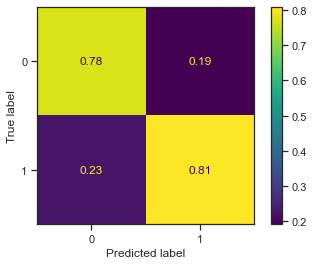

In [13]:
# display a plot  of the confusion matrix 
# the normalise field allows the results to be shown as a ratio of predicted / true or all values
# Reference 23

cm = confusion_matrix(y_Test, y_pred, normalize='pred')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

***

### Algorithm 2 - Naive Bayes (Gaussian)

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

This algorithms based on the mimplementation of the Baynes theorem.  There are a number of classifiers that can be used to explore this algorithm, including
- Bernoulli
- Categorial features
- Complement Classifer by Rennie et al
- Gaussian 
- Classifier for Mulinomial models
<br>


Gaussian model with be the classifier choosen for this project.  The Gaussian process follows a normal distribution i.e. it takes a bell shaped curve.  

https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier



In [14]:
#create the Guassian Navie Bayes classifier

gnbClf = GaussianNB()


In [15]:
#set fit the classifer to the train and test data

gnbClf.fit(X_Train2, y_Train2)

GaussianNB()

In [16]:
# Predicting the Test set results

y_pred2 = gnbClf.predict(X_Test2)

In [17]:
#com

cm_test2 = confusion_matrix(y_pred2, y_Test2)

In [18]:
y_pred_train2 = gnbClf.predict(X_Train2)
cm_train2 = confusion_matrix(y_pred_train2, y_Train2)

In [19]:
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train2[0][0] + cm_train2[1][1])/len(y_Train2)))


Accuracy for training set for Naive Bayes = 0.859504132231405


In [20]:
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test2[0][0] + cm_test2[1][1])/len(y_Test2)))

Accuracy for test set for Naive Bayes = 0.7868852459016393


### Decision Trees

https://scikit-learn.org/stable/modules/tree.html

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052


Source for graphic ...
https://medium.com/machine-learning-researcher/decision-tree-algorithm-in-machine-learning-248fb7de819e

Decision Tress are methods of completing machine learning by working through a series of true / false statements, from the roots of the tree to the top of the tree (aka the leaf) [19, 20].  As the algorithm works its way up the tree to the leaves testing each piece of test data against the nodes trained during the testing phase [19].  A long (deep) tree means more rules that must be followed, this in turn makes the tree more complex with the end result being that the model will be more robust [19].
<br><br>
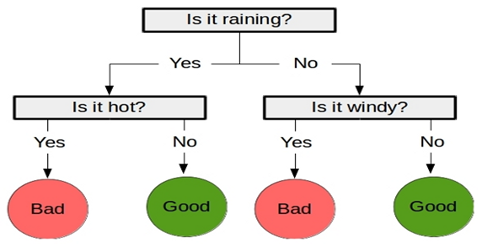
<br>
<i>Source: Kdnuggets.com [20]</i>
<br>
#### Advantages of Decision Trees
Some advantages of decision trees include [19];
- decision trees are simple to understand and to be visualised.
- very little time needs to be put into prepration of the data before being used 
- costs of using the tree are proportional to the number of nodes / decisions to be made
- scikit-learn can only support numerical data at this point
- uses a white box model, i.e. an observable outcome can be explained by boolean logic
- the model can be validated using statisitcal tests to ensure reability of the data
- maintains performance of the mofel even where some of the base assumptions are not held true


#### Disadvantages of Decision Trees

Disadvantages of decsion trees are [19];
- trees can be too complex / detailed which leads to the algorithm looking for specific data points rather than generally fitting the model
- trees can be unstable with small differences in the data set resulting in a different tree being created than expected
- predictions made using decision trees can be slow as each piece of data needs to be measured against the nodes
- bias can be introduced if some of the classes of data are more dominate that others.
<br>

In [41]:
# create the Decision Tree Classifier

dt_clf = DecisionTreeClassifier()

In [42]:
# fit the X_Train3 and y_Train3 values created earlier to the 
# DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_Train3, y_Train3)

In [43]:
# Predicte the result based on the test data

y_pred3 = dt_clf.predict(X_Test3)

In [44]:
# creating the confusion matrix, based on predicted data and test data

cm_test3 = confusion_matrix(y_pred3, y_Test3)

In [45]:
#complete the predctionns using the DecisionTreeClassifier()

y_pred_train3 = dt_clf.predict(X_Train3)

#load the predition data into the confusion matrix
cm_train3 = confusion_matrix(y_pred_train3, y_Train3)

In [46]:
print('Accuracy for training set for Decision Tree = {}'.format((cm_train3[0][0] + cm_train3[1][1])/len(y_Train3)))


Accuracy for training set for Decision Tree = 1.0


In [47]:
print('Accuracy for test set for Decision Tree = {}'.format((cm_test3[0][0] + cm_test3[1][1])/len(y_Test3)))


Accuracy for test set for Decision Tree = 0.7377049180327869


### References:

1. Scikit-learn.org https://scikit-learn.org/stable/tutorial/index.html
2. Wikipedia.com / scikit-learn - https://en.wikipedia.org/wiki/Scikit-learn
3. MachineLearningMastery.com / Introductuin to scikit-learn - https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
4. UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets/Heart+Disease, accessed 05 November 2021
5. Toward Data Science - https://towardsdatascience.com/heart-disease-prediction-73468d630cfc, accessed 05 November 2021
6. Scikit-learn.org / An Introduction to Machine Learning -  https://scikit-learn.org/stable/tutorial/basic/tutorial.html, accessed 09 November 2021
7. Scikit-learn.org / Classification - https://scikit-learn.org/stable/modules/sgd.html#classification, accessed 09 November 2021
8. IBM /Supervised vs. Unsupervised Learning: What’s the Difference? https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning, access 09 November 2021
9. Pandas.pydata.org, Pandas.dataframe.corr, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html, accessed 20 December 2020
10. RealPython.com, NumPy, SciPy, and Pandas: Correlation With Python, https://realpython.com/numpy-scipy-pandas-correlation-python/, accessed 20 December 2020
11. Wikipedia.com, Pearson correlation coefficient , https://en.wikipedia.org/wiki/Pearson_correlation_coefficient, accessed 20 December 2020
12. Wikipedia.com, Spearman's rank correlation coefficient, https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient,accessed 20 December 2020
13. Wikipedia.com, Kendall rank correlation coefficient, ,accessed 20 December 2020
14. TowardsDataScience.com, Undertanding the Confusion Matrix from Scikit-learn, https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79, accessed on 20 November 2021
15. Scikit-learn.org, sklearn.metrics.confusion_matrix, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html, accessed 20 November 2021
16. Scikit-learn.org, Naive Bayes, https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes, accessed 21 November 2021
17. Scikit-learn.org, Gaussian Naive Bayes,https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB, accessed 21 November 2021
18. MachineLearningMastery.com, Naive Bayes, https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/, accessed 27 November 2021
19. Scikit-learn.org, Decision Trees, https://scikit-learn.org/stable/modules/tree.html, accessed 27 November 2021
20. Kdnuggets.com, Decision Trees Explained, https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html, accessed 27 November 2021
21. 
22. 
23. 
24. 
25. 



## End
